<a href="https://colab.research.google.com/github/tatyana-ketova/-Education-in-Portugal/blob/main/Survey_of_student_in_Portugal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data were obtained in a survey of students math and portuguese language courses in secondary school. It contains a lot of interesting social, gender and study information about students. 
Basically, I tried to practice my SQL skills by asking different questions and trying to find answers to them.

In [1]:
# Load some libraries I need
import pandas as pd #https://pandas.pydata.org/
import numpy as np #https://numpy.org/
import pandas.io.sql as pd_sql #https://pandas.pydata.org/pandas-docs/version/0.16.0/generated/pandas.io.sql.read_sql.html
import sqlite3 as sql #https://docs.python.org/3/library/sqlite3.html
%load_ext google.colab.data_table


In [2]:
pd.__version__#Check API version. 

'1.3.5'

In [3]:
from google.colab import drive #https://colab.research.google.com/notebooks/io.ipynb
drive.mount('/content/drive')

Mounted at /content/drive


STORE CSV PATH IN PANDAS DATAFRAME

In [4]:
#for df1 (student_mat)
path = "/content/drive/MyDrive/student-mat.csv"
df1 = pd.read_csv(path)
# Dataset is now stored in a Pandas Dataframe

In [5]:
#for df2 (student_por)
path = "/content/drive/MyDrive/student-por.csv"
df2 = pd.read_csv(path)
# Dataset is now stored in a Pandas Dataframe

READ CSV INTO SQLITE

In [6]:
#Read CSV into SQLite
db_conn = sql.connect('students.db')
pd_sql.DataFrame.to_sql(df1,'studentmat',db_conn, if_exists='replace') # write to DB as table named ""

In [7]:
# Read CSV into SQLite
db_conn = sql.connect('students.db')
pd_sql.DataFrame.to_sql(df2,'studentpor',db_conn, if_exists='replace') # write to DB as table named """"

In [8]:
#for df1 (student_mat)
print (df1.columns) 

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [9]:
#for df2 (student_por)
print (df2.columns) 

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [10]:
#  Drinking alcohol  and desire to continue studying
# higher - wants to take higher education (binary: yes or no)
# Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
pd.read_sql(
    """
    SELECT COUNT(*), higher
    FROM studentpor
    WHERE Dalc=4 OR Dalc=5
    GROUP BY higher
   
        """, db_conn)


,COUNT(*),higher
0,8,no
1,26,yes


In [13]:
# The number of students who does not want to have high edu on depend on mothers and fathers edu 
# higher - wants to take higher education (binary: yes or no)
#Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
#Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

pd.read_sql(
    """
    SELECT COUNT(*), Medu+Fedu AS Edu
    FROM studentpor
    WHERE higher='no'
    GROUP BY Medu, Fedu
       
    """, db_conn)

,COUNT(*),Edu
0,1,1
1,18,2
2,6,3
3,3,4
4,12,3
5,13,4
6,2,5
7,2,4
8,7,5
9,3,6


In [24]:
# MATCH TABLES from two school
# Drinking alcohol and desire to continue studying
# ALC_P + alcohol consumption (numeric: from 2 - very low to 10 - very high)
pd.read_sql(
    """

    SELECT COUNT(*),studentpor.Dalc+studentpor.Walc AS ALC_P, studentpor.higher
    FROM studentpor
    GROUP BY ALC_P
    UNION  
    SELECT COUNT(*),studentmat.Dalc+studentmat.Walc AS ALC_M, studentmat.higher
    FROM studentmat
    LEFT JOIN studentpor
    ON studentpor.school=studentmat.school AND studentpor.sex=studentmat.sex AND studentpor.age=studentmat.age AND studentpor.address=studentmat.address AND studentpor.famsize=studentmat.famsize AND studentpor.Pstatus=studentmat.Pstatus AND 
    studentpor.Medu=studentmat.Medu AND studentpor.Fedu=studentmat.Fedu AND studentpor.Mjob=studentmat.Mjob AND studentpor.Fjob=studentmat.Fjob AND studentpor.reason=studentmat.reason AND studentpor.nursery=studentmat.nursery AND studentpor.internet=studentmat.internet
    WHERE studentpor.school IS NULL AND studentpor.sex IS NULL AND studentpor.nursery IS NULL AND studentpor.age IS NULL AND studentpor.address IS NULL   AND studentpor.famsize IS NULL AND studentpor.Pstatus IS NULL AND studentpor.Medu IS NULL AND studentpor.Fedu IS NULL
   AND studentpor.Mjob IS NULL AND studentpor.Fjob IS NULL AND studentpor.reason IS NULL AND studentpor.nursery IS NULL AND studentpor.internet IS NULL 
 GROUP BY ALC_M
    

    """, db_conn)

,COUNT(*),ALC_P,higher
0,1,9,yes
1,3,3,yes
2,3,6,yes
3,4,4,yes
4,4,5,no
5,6,9,yes
6,10,2,yes
7,15,10,yes
8,17,8,no
9,32,7,yes


In [17]:

# Drinking alcohol and desire to continue studying, NUM_yes - number of students who want higher study per alcogol, COM_yes - number of students who want higher study, PER - percent
pd.read_sql(
    """

    SELECT COUNT(*) AS Num_yes, Dalc+Walc AS ALC_P, higher, a.COM_YES, COUNT(*)*100.00/a.COM_YES AS per
    FROM studentpor
    INNER JOIN 
    (SELECT COUNT(*) AS COM_YES
    FROM studentpor
    WHERE higher='yes' ) a
    WHERE higher='yes'
    GROUP BY ALC_P
    ORDER BY  higher, ALC_P
        

    """, db_conn)

,Num_yes,ALC_P,higher,COM_YES,per
0,220,2,yes,580,37.931034
1,109,3,yes,580,18.793103
2,86,4,yes,580,14.827586
3,66,5,yes,580,11.379310
4,45,6,yes,580,7.758621
5,23,7,yes,580,3.965517
6,14,8,yes,580,2.413793
7,6,9,yes,580,1.034483
8,11,10,yes,580,1.896552


In [18]:

# Drinking alcohol and desire to continue studying, NUM_no - number of students who do not want higher study per alcogol, COM_no - number of students who do not want higher study, PER - percent
pd.read_sql(
    """
    SELECT COUNT(*) AS Num_no, Dalc+Walc AS ALC_P, higher, a.COM_NO, COUNT(*)*100.00/a.COM_NO AS per
    FROM studentpor
    INNER JOIN 
    (SELECT COUNT(*) AS COM_NO
    FROM studentpor
    WHERE higher='no' ) as a
    WHERE higher='no'
    GROUP BY ALC_P
    ORDER BY  higher, ALC_P
        
    """, db_conn)

,Num_no,ALC_P,higher,COM_NO,per
0,21,2,no,69,30.434783
1,7,3,no,69,10.144928
2,13,4,no,69,18.840580
3,7,5,no,69,10.144928
4,5,6,no,69,7.246377
5,9,7,no,69,13.043478
6,3,8,no,69,4.347826
7,4,10,no,69,5.797101


In [ ]:

# Drinking alcohol and AVG GRADES, ALC -alcohol consumption 
pd.read_sql(
    """
    SELECT COUNT(*), Dalc+Walc AS ALC , AVG(G1+G2+G3) AS GRADE
    FROM studentpor
    GROUP BY ALC
    ORDER BY  GRADE, ALC
      
    """, db_conn)

,COUNT(*),ALC,GRADE
0,15,10,29.600000
1,6,9,30.333333
2,50,6,31.040000
3,17,8,31.588235
4,32,7,31.843750
5,99,4,34.414141
6,73,5,34.890411
7,241,2,36.016598
8,116,3,36.775862


In [25]:
# Mediana for  G3

import pandas as pd
df2.groupby(["Dalc"]).agg({'G3':['median']})
df2.groupby(["Dalc"]).agg({'G3':['median']})

,G3
,median
Dalc,
1,12.0
2,11.0
3,11.0
4,11.0
5,10.0


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


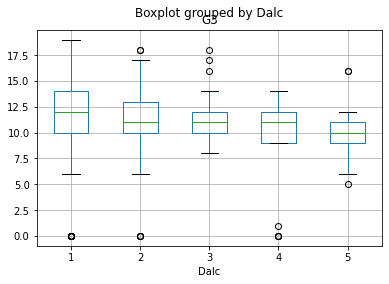

In [26]:
# boxplot of G3 by workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

pd.boxplot= df2.boxplot(column=['G3'], by='Dalc' )

In [27]:
# Drinking alcohol and AVG GRADES, ALC -alcohol consumption 
pd.read_sql(
    """
       SELECT
      Medu+Fedu AS EDU,
      
      AVG(G1),
      AVG(G2),
       AVG(G3)
    FROM studentpor
    group  by EDU
    order  by EDU
        
    """, db_conn)

,EDU,AVG(G1),AVG(G2),AVG(G3)
0,0,10.000000,11.000000,11.000000
1,1,10.857143,11.142857,12.000000
2,2,10.378947,10.421053,10.673684
3,3,10.625000,10.931818,11.193182
4,4,11.200000,11.123077,11.538462
5,5,11.168831,11.597403,11.935065
6,6,12.022472,12.112360,12.292135
7,7,12.208955,12.432836,13.044776
8,8,12.494737,12.821053,13.115789


In [28]:
# Travel time and absences 
pd.read_sql(
    """
      SELECT  traveltime, SUM(absences), COUNT(absences), SUM(absences)*1.00/COUNT(absences) AS ABS_per_STUDENT
   FROM studentpor
   GROUP BY traveltime
          """, db_conn)

,traveltime,SUM(absences),COUNT(absences),ABS_per_STUDENT
0,1,1337,366,3.653005
1,2,792,213,3.718310
2,3,198,54,3.666667
3,4,48,16,3.000000


In [ ]:
# health and absences 
pd.read_sql(
    """
      SELECT  health, SUM(absences), COUNT(absences), SUM(absences)*1.00/COUNT(absences) AS ABS_per_STUDENT
   FROM studentpor
   GROUP BY health
      
    """, db_conn)

,health,SUM(absences),COUNT(absences),ABS_per_STUDENT
0,1,380,90,4.222222
1,2,268,78,3.435897
2,3,467,124,3.766129
3,4,350,108,3.240741
4,5,910,249,3.654618


In [29]:
# Family relationship and grades 
pd.read_sql(
    """
      SELECT  famrel, AVG(G1)+AVG(G2)+AVG(G3)
   FROM studentpor
   GROUP BY famrel
      

    """, db_conn)

,famrel,AVG(G1)+AVG(G2)+AVG(G3)
0,1,31.318182
1,2,32.344828
2,3,33.940594
3,4,35.981073
4,5,34.294444


In [ ]:
# Frends relationship and grades 
pd.read_sql(
    """
      SELECT  goout, AVG(G1)+AVG(G2)+AVG(G3)
   FROM studentpor
   GROUP BY goout
      
    """, db_conn)

,goout,AVG(G1)+AVG(G2)+AVG(G3)
0,1,31.583333
1,2,37.006897
2,3,35.531707
3,4,34.751773
4,5,32.436364


In [33]:

# GRADES and answers
pd.read_sql(
    """
      SELECT COUNT(*) AS Number_of_students,
      CASE WHEN (G1+G2+G3)>(SELECT AVG(G1+G2+G3) AS AVERAGE
      FROM studentpor) THEN 'grade upper average'
      ELSE  'grade below average' END AS result,
      ROUND(AVG(Dalc),2) AS  workday_alcohol,
      ROUND(AVG(Walc),2) AS weekend_alcohol,
      ROUND(AVG(famrel),2) AS fam_relationships,
      ROUND(AVG(goout),2) AS goout,
      ROUND(AVG(absences),2) AS absences,
      ROUND(AVG(health),2) AS health,
      ROUND(AVG(Medu+Fedu),2) AS parent_edu,
      ROUND(AVG(traveltime),2) AS traveltime,
      ROUND(AVG(studytime),2) AS studytime,
      ROUND(AVG(freetime),2) AS freetime
            
   FROM studentpor
   GROUP BY result
            
    """, db_conn)

,Number_of_students,result,workday_alcohol,weekend_alcohol,fam_relationships,goout,absences,health,parent_edu,traveltime,studytime,freetime
0,321,grade below average,1.70,2.52,3.84,3.29,4.45,3.67,4.28,1.72,1.74,3.28
1,328,grade upper average,1.31,2.05,4.02,3.09,2.88,3.41,5.35,1.42,2.12,3.08


In [31]:

# GRADES and wants to take higher education (binary: yes or no)

pd.read_sql(
    """
      SELECT COUNT(*) AS Number_of_students,
      CASE WHEN (G1+G2+G3)>(SELECT AVG(G1+G2+G3) AS AVERAGE
      FROM studentpor) THEN 'grade upper average'
      ELSE  'grade below average' END AS result,
      higher
       FROM studentpor
       GROUP BY result,higher 
          
    """, db_conn)

,Number_of_students,result,higher
0,67,grade below average,no
1,254,grade below average,yes
2,2,grade upper average,no
3,326,grade upper average,yes


In [32]:

# TWO GROUP OF STUDENTS WHO HAVE above-average grades AND below average grades
# PRC_having_roman_with_low_grade + Percentage of students with below average grades who are  in a romantic relationship
# PRC_nohaving_roman_with_low_grade Percentage of students with below average grades who are not in a romantic relationship
# PRC_having_roman_with_high_grade -Percentage of students with above-average grades who are in a romantic relationship
# PRC_nohaving_roman_with_high_grade - Percentage of students with above-average grades who are not in a romantic relationship

pd.read_sql(
    """
      SELECT (SELECT COUNT(*) AS Number_of_students_h
      FROM studentpor
      WHERE (G1+G2+G3)>(SELECT AVG(G1+G2+G3) AS AVERAGE
      FROM studentpor)) AS NUMBER_ALL_HIGH,

      (SELECT COUNT(*) AS Number_of_students_l
      FROM studentpor
      WHERE (G1+G2+G3)<(SELECT AVG(G1+G2+G3) AS AVERAGE
      FROM studentpor)) AS NUMBER_ALL_LOW,

      (SELECT COUNT(*) AS Number_of_students_l_ROM
      FROM studentpor
      WHERE (G1+G2+G3)<(SELECT AVG(G1+G2+G3) AS AVERAGE
      FROM studentpor) AND romantic='yes')*100.00/((SELECT COUNT(*) AS Number_of_students_l
      FROM studentpor
      WHERE (G1+G2+G3)<(SELECT AVG(G1+G2+G3) AS AVERAGE
      FROM studentpor)) ) AS PRC_having_roman_with_low_grade,

      (SELECT COUNT(*) AS Number_of_students_l_NOROM
      FROM studentpor
      WHERE (G1+G2+G3)<(SELECT AVG(G1+G2+G3) AS AVERAGE
      FROM studentpor) AND romantic='no')*100.00/(((SELECT COUNT(*) AS Number_of_students_l
      FROM studentpor
      WHERE (G1+G2+G3)<(SELECT AVG(G1+G2+G3) AS AVERAGE
      FROM studentpor)) )) AS PRC_nohaving_roman_with_low_grade,

      (SELECT COUNT(*) AS Number_of_students_h_ROM
      FROM studentpor
      WHERE (G1+G2+G3)>(SELECT AVG(G1+G2+G3) AS AVERAGE
      FROM studentpor) AND romantic='yes')*100.00/(((SELECT COUNT(*) AS Number_of_students_h
      FROM studentpor
      WHERE (G1+G2+G3)>(SELECT AVG(G1+G2+G3) AS AVERAGE
      FROM studentpor)) )) AS PRC_having_roman_with_high_grade,

       (SELECT COUNT(*) AS Number_of_students_h_NOROM
      FROM studentpor
      WHERE (G1+G2+G3)>(SELECT AVG(G1+G2+G3) AS AVERAGE
      FROM studentpor) AND romantic='no')*100.00/(((SELECT COUNT(*) AS Number_of_students_h
      FROM studentpor
      WHERE (G1+G2+G3)>(SELECT AVG(G1+G2+G3) AS AVERAGE
      FROM studentpor)) )) AS PRC_nohaving_roman_with_high_grade

       FROM studentpor
       LIMIT 1;
       
          
    """, db_conn)

,NUMBER_ALL_HIGH,NUMBER_ALL_LOW,PRC_having_roman_with_low_grade,PRC_nohaving_roman_with_low_grade,PRC_having_roman_with_high_grade,PRC_nohaving_roman_with_high_grade
0,328,321,39.875389,60.124611,33.841463,66.158537


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


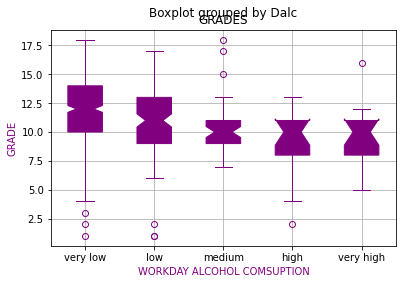

In [ ]:

# boxplot of average Grade by workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
import matplotlib.pyplot as plt 

df6=pd.read_sql(
    """
    SELECT (G1+G2+G3)/3 AS GRADES,Dalc
    FROM studentpor
        
    """, db_conn)
c = "purple"
pd.boxplot= df6.boxplot(column=['GRADES'], by='Dalc', notch=True, patch_artist=True, boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c),) 
plt.xlabel('WORKDAY ALCOHOL COMSUPTION', color='purple')
plt.xticks([1,2,3,4,5],['very low', 'low','medium','high','very high'])
plt.ylabel('GRADE',color='purple')
plt.savefig('my_chart.png')
plt.show()


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


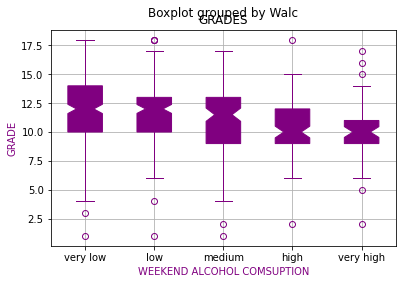

In [ ]:

# boxplot of average Grade by weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

df6=pd.read_sql(
    """
    SELECT (G1+G2+G3)/3 AS GRADES,Walc
    FROM studentpor
    
    
    """, db_conn)
c = "purple"
pd.boxplot= df6.boxplot(column=['GRADES'], by='Walc', notch=True, patch_artist=True, boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c),) 
plt.xlabel('WEEKEND ALCOHOL COMSUPTION', color='purple')
plt.ylabel('GRADE',color='purple')
plt.xticks([1,2,3,4,5],['very low', 'low','medium','high','very high'])
plt.savefig('my_chart.png')
plt.show()
